In [27]:
import sklearn.tree
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.neural_network
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fraud_data.csv to fraud_data (1).csv
User uploaded file "fraud_data.csv" with length 1277 bytes


In [3]:
df = pd.read_csv("funding.csv")

print(df.head())
print(df.shape)

   amount_requested  post_length  funding_status
0              6500         1869               0
1            335000          451               0
2              2000          628               1
3               200         2400               1
4              7000          936               0
(100, 3)


In [17]:
X = df.loc[:, "amount_requested":"post_length"].values.tolist()
y = df.loc[:, "funding_status"].values.tolist()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [6]:
print(type(X_train))
print(type(y_train))

<class 'list'>
<class 'list'>


In [7]:
print(X_train)
print(y_train)

[[6500, 1869], [335000, 451], [2000, 628], [200, 2400], [7000, 936], [500, 399], [5000, 327], [4300, 497], [1650, 818], [10000, 311], [12000, 209], [1500, 732], [7500, 317], [100, 191], [1000, 592], [3500, 1126], [3000, 197], [15000, 1076], [3350, 466], [2300, 535], [5500, 45], [1500, 558], [5000, 352], [35000, 359], [6500, 618], [1900, 914], [32000, 449], [70000, 767], [10000, 27], [1500, 720], [1000, 320], [8000, 311], [2000, 627], [5000, 40], [10, 170], [11111, 371], [1600, 567], [150000, 809], [2000, 198], [5000, 224], [10000, 741], [3500, 920], [1350, 325], [700, 337], [1000, 334], [1000, 242], [1600, 391], [40000, 1271], [5000, 249], [6000, 1252], [5000, 255], [9300, 991], [17500, 307], [750, 861], [2500, 1008], [3000, 1140], [450, 737], [5000, 815], [2000, 110], [6000, 1089], [13000, 1463], [18500, 547], [6000, 363], [10000, 307], [500, 1751], [3000, 552], [6000, 957], [10000, 994], [30000, 927], [10, 252], [20000, 156], [1000, 900], [1500, 237], [12500, 356], [2000, 297], [5800

In [21]:
clf = sklearn.tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

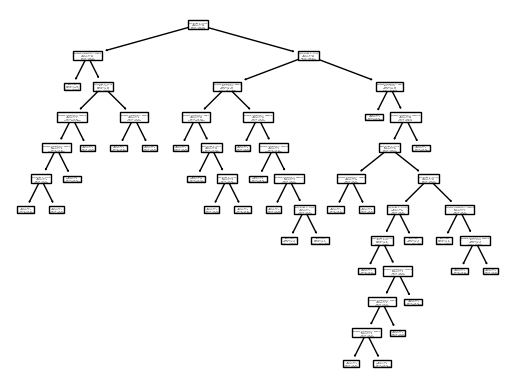

In [22]:
sklearn.tree.plot_tree(clf, feature_names = df.columns, class_names = ["funding", "no funding"])
plt.show()

In [23]:
clf.score(X_test, y_test)

0.52

In [24]:
new_values = [[4000,213],
              [3000,100],
              [100,2000]]

print(clf.predict(new_values))

[1 1 1]


In [25]:
clf = sklearn.neural_network.MLPClassifier()
clf = clf.fit(X_train,y_train)


In [26]:
clf.score(X_test, y_test)

0.52

In [30]:
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=0)

In [31]:
clf.score(X_test,y_test)

0.56